In [1]:
import json

trainset = json.load(open("qas/train.json"))

In [2]:
trainset.keys()

dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data'])

In [3]:
trainset["data"][:2]

[{'questionId': 337,
  'question': 'what is the date mentioned in this letter?',
  'doc_id': 'xnbl0037',
  'page_ids': ['xnbl0037_p0', 'xnbl0037_p1'],
  'answers': ['1/8/93'],
  'answer_page_idx': 0,
  'data_split': 'train'},
 {'questionId': 338,
  'question': 'what is the contact person name mentioned in letter?',
  'doc_id': 'xnbl0037',
  'page_ids': ['xnbl0037_p0', 'xnbl0037_p1'],
  'answers': ['P. Carter', 'p. carter'],
  'answer_page_idx': 0,
  'data_split': 'train'}]

In [4]:
testset = json.load(open("qas/test.json"))
testset.keys()

dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data'])

In [5]:
testset["data"][:2]

[{'questionId': 57344,
  'question': 'What is the dividend payout in 2012?',
  'doc_id': 'rnbx0223',
  'page_ids': ['rnbx0223_p192', 'rnbx0223_p193'],
  'data_split': 'test'},
 {'questionId': 16384,
  'question': 'What is the name of the person in the CC field ?',
  'doc_id': 'lflm0081',
  'page_ids': ['lflm0081_p0'],
  'data_split': 'test'}]

In [6]:
import os

os.listdir("ocr")[:10]

['txcx0227_p5.json',
 'jzhd0227_p26.json',
 'mlcf0227_p12.json',
 'zmhd0227_p4.json',
 'ffpw0079_p7.json',
 'pkbv0228_p10.json',
 'pqmw0228_p3.json',
 'skgb0228_p83.json',
 'fzdn0020_p2.json',
 'ftxf0227_p2.json']

A document can have multiple pages. E.g. a doc can be txcx0227, but we have all its pages, like txcx0227_p5, txcx0227_p6...

In [7]:
len(os.listdir("ocr"))

64057

In [8]:
not_json = [f for f in os.listdir("ocr") if not f.endswith(".json")]
not_json # f no readme

[]

In [9]:
import re
# files be like "txcx0227_p5.json", so extract "_pX" from filename
all_pages = [re.search(r"_p\d+", filename).group() for filename in os.listdir("ocr")]
unique_pages = set(all_pages)
# sort by page number
unique_pages = sorted(list(unique_pages), key=lambda x: int(x[2:]))
unique_pages[0:10] + unique_pages[-10:]

['_p0',
 '_p1',
 '_p2',
 '_p3',
 '_p4',
 '_p5',
 '_p6',
 '_p7',
 '_p8',
 '_p9',
 '_p783',
 '_p784',
 '_p785',
 '_p786',
 '_p787',
 '_p788',
 '_p789',
 '_p790',
 '_p791',
 '_p792']

There are some docs that have until 792 pages. The paper truncated to 20, but here we are provided with all.

[]

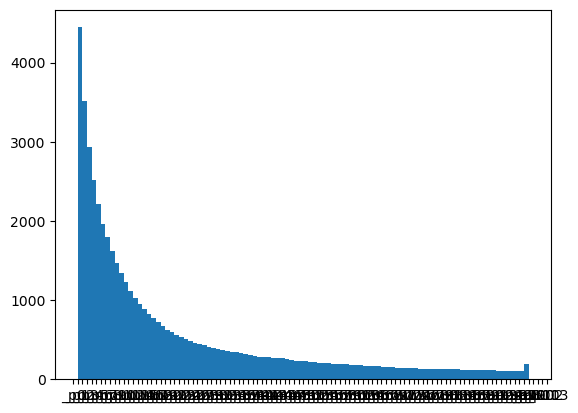

In [10]:
import matplotlib.pyplot as plt
all_pages = sorted(list(all_pages), key=lambda x: int(x[2:]))
plt.hist(all_pages, bins=range(1, 100))
plt.plot()

This only shows that most documents have few pages

In [11]:
from collections import Counter
Counter(all_pages).most_common(10)

[('_p0', 6071),
 ('_p1', 4446),
 ('_p2', 3510),
 ('_p3', 2936),
 ('_p4', 2523),
 ('_p5', 2216),
 ('_p6', 1967),
 ('_p7', 1795),
 ('_p8', 1620),
 ('_p9', 1468)]

In [12]:
name_d0 = os.listdir("ocr")[0][:8]
name_d0

'txcx0227'

In [13]:
ocr_d0 = [file for file in os.listdir("ocr") if name_d0 in file]
len(ocr_d0)

20

In [14]:
name_d0_p0 = name_d0 + "_p0"
ocr_d0_p0 = json.load(open(os.path.join("ocr", name_d0_p0+".json")))
ocr_d0_p0.keys()

dict_keys(['PAGE', 'LINE', 'WORD'])

In [15]:
ocr_d0_p0["PAGE"]
# a single page
# Geometry: from 0 to 1 because it's the full page
# Polygon: same
# Id: unique id of the page
# Relationships["Ids"]: list of ids of the lines in the page

[{'BlockType': 'PAGE',
  'Geometry': {'BoundingBox': {'Width': 1.0,
    'Height': 1.0,
    'Left': 0.0,
    'Top': 0.0},
   'Polygon': [{'X': 1.57116617842233e-16, 'Y': 0.0},
    {'X': 1.0, 'Y': 9.54552000856311e-17},
    {'X': 1.0, 'Y': 1.0},
    {'X': 0.0, 'Y': 1.0}]},
  'Id': '366c5413-4948-4e22-abce-7e9e03f5eca4',
  'Relationships': [{'Type': 'CHILD',
    'Ids': ['f776fbbb-8fc2-4ce1-ade1-d9e09e3f8d5f',
     'c8695325-182f-43f7-a55b-8b1deb1f6516',
     '539fbe84-85a0-495d-a7bd-4edab2c8c95f',
     '9384602c-e1b3-4451-8b67-7dd2c24ff4f1',
     'a34776bf-05e7-4756-a485-977d6a82e577',
     '7c25f8e7-85b7-4ca3-aed9-08d12ba01fde',
     'f1709b00-f67e-40b7-b892-c685810eb909',
     'b948d580-4309-45de-81c8-219b94881a37',
     '1acdb1ef-9c57-4c19-947d-d2c0c8dae866',
     'da67d993-01bf-4957-bc2f-bb4f61331296',
     '0efb38a4-8760-451c-9cf4-14fdc89adaea',
     'e52f9678-f57d-4721-8871-a1b0b2ecd255',
     'a8d559eb-0626-4d84-8a5d-4dd74a8acf33',
     'cd1ac500-9dc0-48b2-8204-63989990b26b',
     

In [16]:
ocr_d0_p0["LINE"]
# list of all lines in the page
# Geometry: now yes the rectangle of the line
# Polygon: same
# Id: unique id of the line
# Relationships["Ids"]: list of ids of the words in the line

[{'BlockType': 'LINE',
  'Confidence': 97.69432830810547,
  'Text': 'CHO, Ei SOON',
  'Geometry': {'BoundingBox': {'Width': 0.1963403820991516,
    'Height': 0.027734965085983276,
    'Left': 0.7669923901557922,
    'Top': 0.012153040617704391},
   'Polygon': [{'X': 0.7669923901557922, 'Y': 0.012153040617704391},
    {'X': 0.9633327722549438, 'Y': 0.012153040617704391},
    {'X': 0.9633327722549438, 'Y': 0.03988800570368767},
    {'X': 0.7669923901557922, 'Y': 0.03988800570368767}]},
  'Id': 'f776fbbb-8fc2-4ce1-ade1-d9e09e3f8d5f',
  'Relationships': [{'Type': 'CHILD',
    'Ids': ['38bae698-e8d0-40cf-bcc0-899a1f8b78ee',
     'dbf4a171-7a12-4f8c-bd7d-d852ee1ae01b',
     '1e90a5a6-3a3d-410f-8970-2fa0c386e3f5']}]},
 {'BlockType': 'LINE',
  'Confidence': 99.17454528808594,
  'Text': 'Page 1',
  'Geometry': {'BoundingBox': {'Width': 0.04875301197171211,
    'Height': 0.013077988289296627,
    'Left': 0.8341683149337769,
    'Top': 0.04966922849416733},
   'Polygon': [{'X': 0.8341683149337769

In [17]:
ocr_d0_p0["WORD"]
# List of all words in the page
# All same as line, word has no relationships, but has TextType ("HANDWRITING", "PRINTED", ...)

[{'BlockType': 'WORD',
  'Confidence': 94.69935607910156,
  'Text': 'CHO,',
  'TextType': 'HANDWRITING',
  'Geometry': {'BoundingBox': {'Width': 0.06457041203975677,
    'Height': 0.027734965085983276,
    'Left': 0.7669923901557922,
    'Top': 0.012153040617704391},
   'Polygon': [{'X': 0.7669923901557922, 'Y': 0.012153040617704391},
    {'X': 0.8315628170967102, 'Y': 0.012153040617704391},
    {'X': 0.8315628170967102, 'Y': 0.03988800570368767},
    {'X': 0.7669923901557922, 'Y': 0.03988800570368767}]},
  'Id': '38bae698-e8d0-40cf-bcc0-899a1f8b78ee'},
 {'BlockType': 'WORD',
  'Confidence': 99.36614227294922,
  'Text': 'Ei',
  'TextType': 'HANDWRITING',
  'Geometry': {'BoundingBox': {'Width': 0.027528727427124977,
    'Height': 0.0193101204931736,
    'Left': 0.8403675556182861,
    'Top': 0.013187992386519909},
   'Polygon': [{'X': 0.8403675556182861, 'Y': 0.013187992386519909},
    {'X': 0.8678962588310242, 'Y': 0.013187992386519909},
    {'X': 0.8678962588310242, 'Y': 0.03249811381

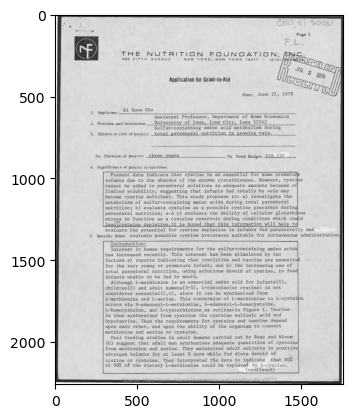

In [18]:
img_d0_p0 = plt.imread(os.path.join("images", name_d0_p0 + ".jpg"))
plt.imshow(img_d0_p0)

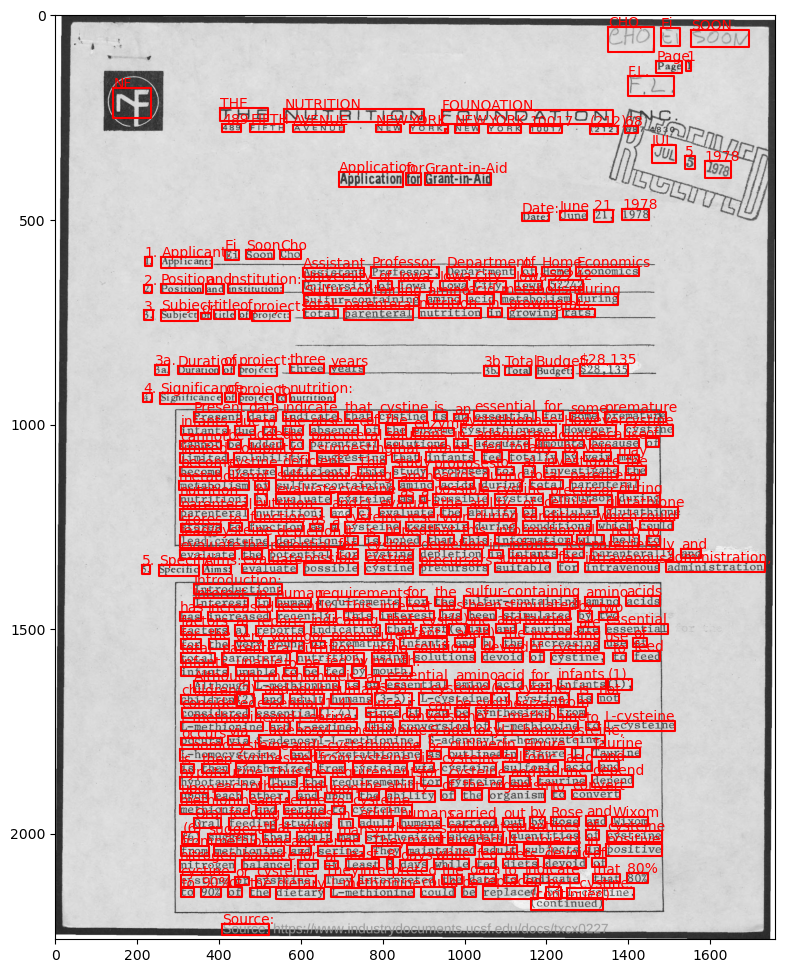

In [19]:
"""
ocr_p0_0["WORD"] is like:
[{'BlockType': 'WORD',
  'Confidence': 97.95365905761719,
  'Text': '1/23/61',
  'TextType': 'HANDWRITING',
  'Geometry': {'BoundingBox': {'Width': 0.12033263593912125,
    'Height': 0.04190509393811226,
    'Left': 0.8151262402534485,
    'Top': 0.021900899708271027},
   'Polygon': [{'X': 0.8151262402534485, 'Y': 0.021900899708271027},
    {'X': 0.9353389143943787, 'Y': 0.022108789533376694},
    {'X': 0.9354588985443115, 'Y': 0.06380598992109299},
    {'X': 0.8152318596839905, 'Y': 0.06361416727304459}]},
  'Id': 'a0f3b350-a7e5-4c01-abaa-272b9d384a72'},
 {'BlockType': 'WORD',
  'Confidence': 99.8161849975586,
  ...
"""
# Now draw the bounding box of the first n=10 words with the recognized text above
n = len(ocr_d0_p0["WORD"])
plt.figure(figsize=(12, 12))
plt.imshow(img_d0_p0)
for word in ocr_d0_p0["WORD"][:n]:
	bbox = word["Geometry"]["BoundingBox"]
	x = bbox["Left"]
	y = bbox["Top"]
	w = bbox["Width"]
	h = bbox["Height"]
	x *= img_d0_p0.shape[1]  # convert relative x to absolute x
	y *= img_d0_p0.shape[0]  # convert relative y to absolute y
	w *= img_d0_p0.shape[1]  # convert relative width to absolute width
	h *= img_d0_p0.shape[0]  # convert relative height to absolute height
	plt.plot([x, x+w, x+w, x, x], [y, y, y+h, y+h, y], color="red")
	plt.text(x, y, word["Text"], color="red")
plt.show()

In [20]:
trainset["data"][0]

{'questionId': 337,
 'question': 'what is the date mentioned in this letter?',
 'doc_id': 'xnbl0037',
 'page_ids': ['xnbl0037_p0', 'xnbl0037_p1'],
 'answers': ['1/8/93'],
 'answer_page_idx': 0,
 'data_split': 'train'}

In [21]:
questions_from_doc0 = [q for q in trainset["data"] if q["doc_id"] == name_d0]
len(questions_from_doc0)

4

In [22]:
questions_from_doc0[0]

{'questionId': 21019,
 'question': 'What is the name of the person to whom this resume belongs to?',
 'doc_id': 'txcx0227',
 'page_ids': ['txcx0227_p15',
  'txcx0227_p16',
  'txcx0227_p17',
  'txcx0227_p18',
  'txcx0227_p19'],
 'answers': ['Ei Soon Cho'],
 'answer_page_idx': 2,
 'data_split': 'train'}

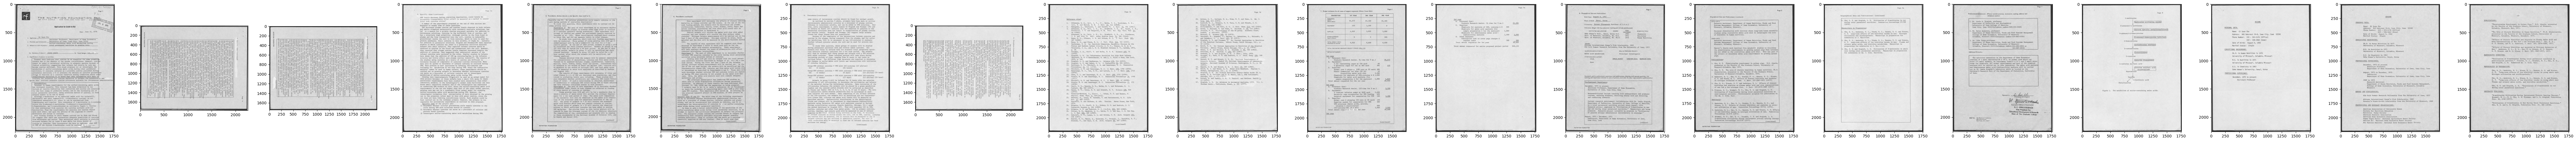

In [23]:
name_d0_pX = [filename[:-5] for filename in os.listdir("ocr") if filename.startswith(name_d0)]
name_d0_pX = sorted(name_d0_pX, key=lambda x: int(x[10:]))
image_d0_pX = [plt.imread(os.path.join("images", filename+".jpg")) for filename in name_d0_pX]
plt.figure(figsize=(6*len(image_d0_pX), 6))
for i, img in enumerate(image_d0_pX):
	plt.subplot(1, len(image_d0_pX), i+1)
	plt.imshow(img)
plt.show()

In [24]:
ocr_d0_pX = [json.load(open(os.path.join("ocr", filename+".json"))) for filename in name_d0_pX]

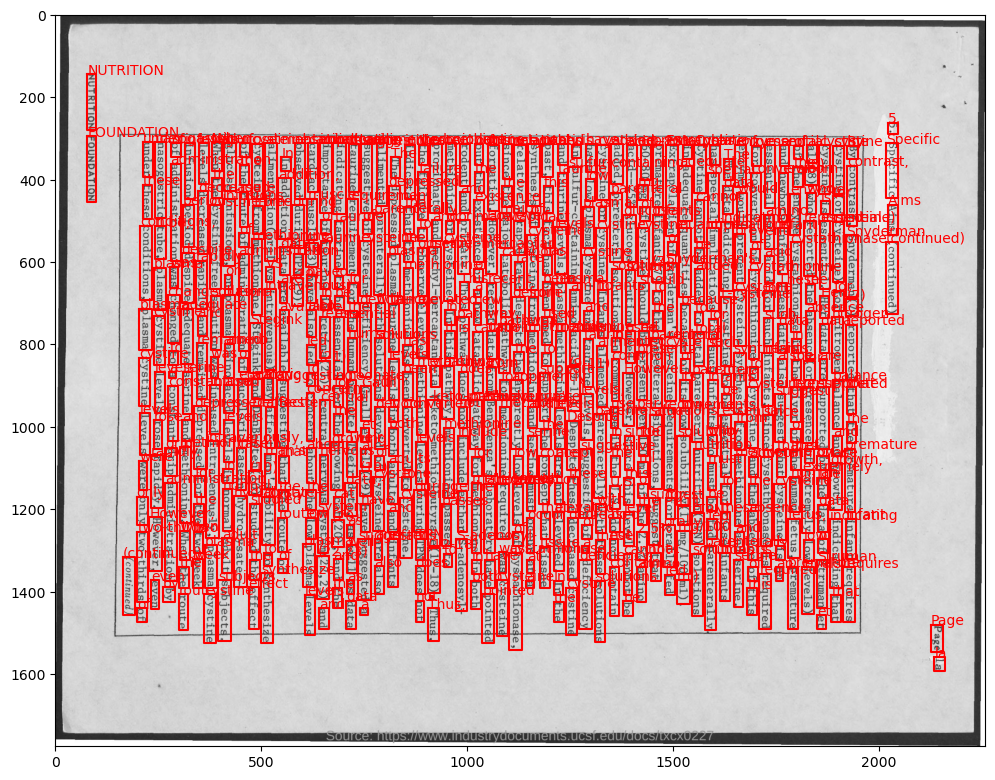

In [25]:
i = 1
n = len(ocr_d0_pX[i]["WORD"])
plt.figure(figsize=(12, 12))
plt.imshow(image_d0_pX[i])
for word in ocr_d0_pX[i]["WORD"][:n]:
	bbox = word["Geometry"]["BoundingBox"]
	x = bbox["Left"]
	y = bbox["Top"]
	w = bbox["Width"]
	h = bbox["Height"]
	x *= image_d0_pX[i].shape[1]  # convert relative x to absolute x
	y *= image_d0_pX[i].shape[0]  # convert relative y to absolute y
	w *= image_d0_pX[i].shape[1]  # convert relative width to absolute width
	h *= image_d0_pX[i].shape[0]  # convert relative height to absolute height
	plt.plot([x, x+w, x+w, x, x], [y, y, y+h, y+h, y], color="red")
	plt.text(x, y, word["Text"], color="red")
plt.show()

---

In [1]:
import numpy as np

imdb_val = np.load("spdocvqa_imdb/imdb_val.npy", allow_pickle=True)
imdb_val.shape, imdb_val[1].keys()

((5350,),
 dict_keys(['question', 'image_id', 'image_classes', 'extra_info', 'image_width', 'image_height', 'question_tokens', 'question_id', 'set_name', 'image_name', 'image_path', 'feature_path', 'ocr_tokens', 'ocr_info', 'ocr_normalized_boxes', 'obj_normalized_boxes', 'answers', 'valid_answers']))

In [2]:
imdb_val[1]

{'question': 'What is the ‘actual’ value per 1000, during the year 1975?',
 'image_id': 'pybv0228_81',
 'image_classes': [],
 'extra_info': {'docId': 14465,
  'ucsf_document_id': 'pybv0228',
  'ucsf_document_page_no': '81'},
 'image_width': 2257,
 'image_height': 1764,
 'question_tokens': ['What',
  'is',
  'the',
  '‘actual’',
  'value',
  'per',
  '1000,',
  'during',
  'the',
  'year',
  '1975'],
 'question_id': 49153,
 'set_name': 'val',
 'image_name': 'pybv0228_81',
 'image_path': 'documents/pybv0228_81.png',
 'feature_path': 'pybv0228_81.npy',
 'ocr_tokens': ['figure',
  'c.',
  '2.',
  'age',
  'adjusted',
  'motor',
  'vehicle',
  'accident',
  'mortality',
  'rate',
  '0.3',
  'canada',
  '8.28',
  '8.26',
  '8.24',
  '8.22',
  '0.2',
  '1958',
  '1955',
  '1968',
  '1965',
  '1978',
  '1975',
  '1980',
  'd.',
  'actual',
  'multivariate',
  'predictor'],
 'ocr_info': [{'word': 'figure',
   'bounding_box': {'topLeftX': 0.47939743021710235,
    'topLeftY': 0.12811791383219956,

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# list all images filenames
all_filenames = [filename[:-5] for filename in os.listdir("spdocvqa_ocr")]
selected_filenames = [filename[:-4] for filename in os.listdir("images")]

# load form images/
images = [Image.open(os.path.join("images", filename)+".png") for filename in selected_filenames]
selected_filenames[:3]

['ffxw0228_1', 'ffnw0228_1', 'fhfd0079_5']

In [29]:
import re
# files be like "txcx0227_p5.json", so extract "_pX" from filename
all_pages = [re.search(r"_\d+", filename).group() for filename in all_filenames]
unique_pages = set(all_pages)
# sort by page number
unique_pages = sorted(list(unique_pages), key=lambda x: int(x[1:]))
unique_pages[0:10] + unique_pages[-10:]

['_1',
 '_2',
 '_3',
 '_4',
 '_5',
 '_6',
 '_7',
 '_8',
 '_9',
 '_10',
 '_459',
 '_467',
 '_483',
 '_486',
 '_502',
 '_564',
 '_572',
 '_593',
 '_645',
 '_646']

[]

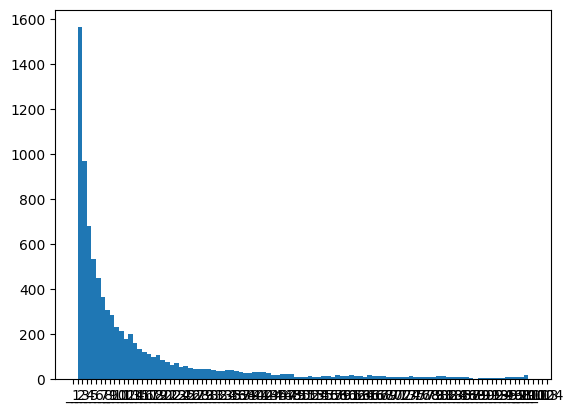

In [31]:
import matplotlib.pyplot as plt
all_pages = sorted(list(all_pages), key=lambda x: int(x[1:]))
plt.hist(all_pages, bins=range(1, 100))
plt.plot()

In [33]:
from collections import Counter
Counter(all_pages).most_common(5), Counter(all_pages).most_common()[-5:]

([('_1', 3906), ('_2', 1562), ('_3', 967), ('_4', 679), ('_5', 532)],
 [('_564', 1), ('_572', 1), ('_593', 1), ('_645', 1), ('_646', 1)])

In [ ]:
imdb_val[1]

In [38]:
selected_imdb_val = [imdb for imdb in imdb_val[1:] if imdb["image_id"] in selected_filenames]
len(selected_imdb_val)

70

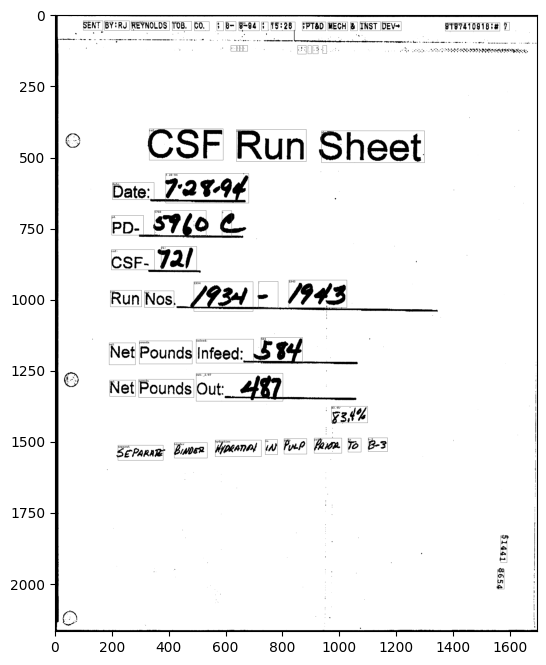

In [49]:
from PIL import ImageDraw

selected_imdb_val[0]["ocr_tokens"], selected_imdb_val[0]["ocr_info"] # this is a list of dicts with keys "word", "bounding_box" : {"topLeftX", "topLeftY", "width", "height"}
# put bounding box and ocr text in image for first document image
image_id = selected_imdb_val[0]["image_id"]
img = images[selected_filenames.index(image_id)]
for token in selected_imdb_val[0]["ocr_info"]:
	bbox = token["bounding_box"]
	x = bbox["topLeftX"]
	y = bbox["topLeftY"]
	w = bbox["width"]
	h = bbox["height"]
	x *= img.size[0]  # convert relative x to absolute x
	y *= img.size[1]  # convert relative y to absolute y
	w *= img.size[0]  # convert relative width to absolute width
	h *= img.size[1]  # convert relative height to absolute height
	draw = ImageDraw.Draw(img)
	draw.rectangle([x, y, x+w, y+h], outline="red")
	draw.text((x, y), token["word"], fill="red")
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.show()

In [16]:
import json
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

ocr_d0 = json.load(open("spdocvqa_ocr/ffbf0023_4.json"))["recognitionResults"][0]
ocr_d0.keys()

dict_keys(['page', 'clockwiseOrientation', 'width', 'height', 'unit', 'lines'])

In [15]:
img = Image.open("images/ffbf0023_4.png")

In [21]:
ocr_d0

{'page': 1,
 'clockwiseOrientation': 359.96,
 'width': 1692,
 'height': 2245,
 'unit': 'pixel',
 'lines': [{'boundingBox': [622, 138, 1137, 136, 1138, 167, 622, 168],
   'text': 'R. J. REYNOLDS TOBACCO COMPANY',
   'words': [{'boundingBox': [622, 138, 655, 139, 656, 168, 624, 167],
     'text': 'R.'},
    {'boundingBox': [661, 139, 685, 140, 687, 168, 662, 168], 'text': 'J.'},
    {'boundingBox': [691, 140, 847, 141, 849, 168, 692, 168],
     'text': 'REYNOLDS'},
    {'boundingBox': [855, 141, 988, 140, 991, 167, 857, 168],
     'text': 'TOBACCO'},
    {'boundingBox': [998, 140, 1135, 137, 1138, 165, 1000, 167],
     'text': 'COMPANY'}]},
  {'boundingBox': [534, 170, 1216, 168, 1217, 202, 535, 203],
   'text': 'RETAIL PARTNERS MARKETING PLAN CONTRACT',
   'words': [{'boundingBox': [539, 171, 643, 174, 645, 203, 541, 202],
     'text': 'RETAIL'},
    {'boundingBox': [649, 174, 801, 175, 803, 203, 651, 203],
     'text': 'PARTNERS'},
    {'boundingBox': [808, 175, 974, 174, 977, 203, 810

[1622, 1917, 1620, 2017, 1592, 2017, 1593, 1917]
[1620, 2041, 1620, 2119, 1594, 2118, 1592, 2041]


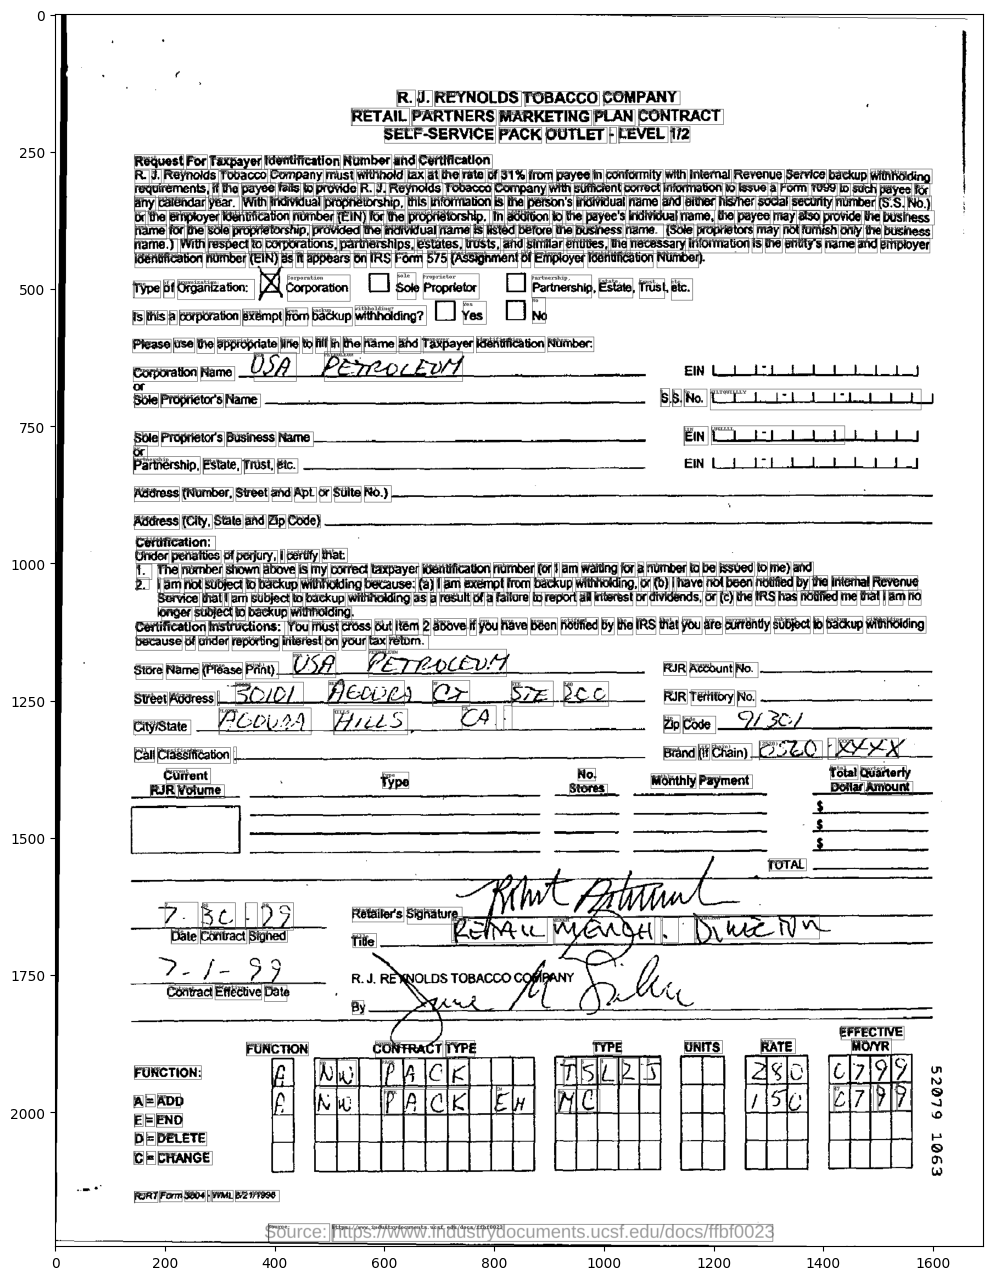

In [22]:
for line in ocr_d0["lines"]:
	for token in line["words"]:
		bbox = token["boundingBox"]
		x = bbox[0]
		y = bbox[1]
		x2 = bbox[-4]
		y2 = bbox[-3]
		draw = ImageDraw.Draw(img)
		try:
			draw.rectangle([x, y, x2, y2], outline="red")
			draw.text((x, y), token["text"], fill="red")
		except:
			print(bbox)
			continue
plt.figure(figsize=(16, 16))
plt.imshow(img, cmap="gray")
plt.show()

In [10]:
ocr_d0["lines"]

[{'boundingBox': [622, 138, 1137, 136, 1138, 167, 622, 168],
  'text': 'R. J. REYNOLDS TOBACCO COMPANY',
  'words': [{'boundingBox': [622, 138, 655, 139, 656, 168, 624, 167],
    'text': 'R.'},
   {'boundingBox': [661, 139, 685, 140, 687, 168, 662, 168], 'text': 'J.'},
   {'boundingBox': [691, 140, 847, 141, 849, 168, 692, 168],
    'text': 'REYNOLDS'},
   {'boundingBox': [855, 141, 988, 140, 991, 167, 857, 168],
    'text': 'TOBACCO'},
   {'boundingBox': [998, 140, 1135, 137, 1138, 165, 1000, 167],
    'text': 'COMPANY'}]},
 {'boundingBox': [534, 170, 1216, 168, 1217, 202, 535, 203],
  'text': 'RETAIL PARTNERS MARKETING PLAN CONTRACT',
  'words': [{'boundingBox': [539, 171, 643, 174, 645, 203, 541, 202],
    'text': 'RETAIL'},
   {'boundingBox': [649, 174, 801, 175, 803, 203, 651, 203],
    'text': 'PARTNERS'},
   {'boundingBox': [808, 175, 974, 174, 977, 203, 810, 203],
    'text': 'MARKETING'},
   {'boundingBox': [980, 174, 1053, 173, 1056, 203, 983, 203], 'text': 'PLAN'},
   {'boun